In [1]:
import pandas as pd
import sys

In [ ]:

# input = 'Data2.txt'
# headers = ['rev_id', 'rating', 'title', 'text', 'username', 'user_loc', 'hotel_id', 'date_stay', 'date_review']
# with open(input, 'r', encoding='utf-8') as f:
#     lines = f.readlines()
#     lines2csv = []
#     count = 0
#     for line in lines:
#         dico2list = {}
#         cols = line.strip().split(';;')
#         if len(cols) == len(headers):
#             cols[3] = cols[3]
#             for i, header in enumerate(headers):
#                 dico2list[header] = cols[i]
#         else:
#             count += 1
#         lines2csv.append(dico2list)
# df = pd.DataFrame(data = lines2csv)
# df.to_csv('hotels_data.csv', sep = ';')
# print(count)

In [2]:
new_df_path = 'hotels_data.csv'

new_df = pd.read_csv(new_df_path, sep = ';')
new_df.head()


,Unnamed: 0,rev_id,rating,title,text,username,user_loc,hotel_id,date_stay,date_review
0,0,147643103.0,5.0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,Papa_Panda,Gold Coast,93338,December 2012,"December 17, 2012"
1,1,147639004.0,5.0,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",Maureen V,"Sydney, New South Wales, Australia",93338,December 2012,"December 17, 2012"
2,2,147697954.0,4.0,“Great Stay”,This is a great property in Midtown. We two di...,vuguru,Houston,1762573,December 2012,"December 18, 2012"
3,3,147625723.0,4.0,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,Hotel-Designer,"Laguna Beach, CA",1762573,August 2012,"December 17, 2012"
4,4,147612823.0,4.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,JamesE339,"Saint Louis, Missouri",1762573,December 2012,"December 17, 2012"


In [3]:
cnt = 0
for txt in df.text:
    cnt+=1
    print(txt)
    print('\n\n')
    if cnt == 10:
        sys.exit()

NameError: name 'df' is not defined

In [10]:
## P(w|?) ? can be positive or negative if stats is positive dictionary or negative dictionary
def score_word(w,stats):
    if w not in stats:
        return 0
    return stats[w]

## positivity of the word
def score(w,stats_p,stats_n):
    ## ATTENTION : I must take into account that, during test conditions,
    ## w can be not in the training positive docs and not int the training negative docs
    sp = score_word(w,stats_p)
    sn = score_word(w,stats_n)
    if sp+sn == 0:
        ## then, by default return 0 : not negative, not positive
        return 0
    return (sp-sn)/(sp+sn)



In [12]:
import pickle
pos_stat_path = 'positive.pkl'
neg_stat_path = 'negative.pkl'
with open(pos_stat_path, 'rb') as f:
    positive_stats = pickle.load(f)

with open(neg_stat_path, 'rb') as fi:
    negative_stats = pickle.load(fi)


In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [20]:
for t in [-4, -2, 0, 2]:
    print("==================",t)

    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for idx, row in new_df.iterrows():
#         print('\n')
        if pd.isna(row['text']) == False:
            sentences = sent_tokenize(row['text'])
            total_score = 0
            for i, sent in enumerate(sentences):
                sc = 0
    #             print('processing sentence #', i, ' : ', sent)
                words = word_tokenize(sent)
                toks = set(words)
                for word in toks:
                    sc += score(word, positive_stats, negative_stats)
                if sc > 0:
                    total_score+= 1
                if sc <= 0: 
                    total_score-= 1
            if total_score > t and row['rating'] > 3:
                tp += 1

            if total_score > t and row['rating'] < 3:
                fp += 1
            if total_score < t and row['rating'] > 3:
                fn += 1

            if total_score < t and row['rating'] < 3:
                tn += 1
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    F1 = 2*(precision*recall)/(precision+recall)

    print("recall",recall)
    print("precision",precision)
    print("F1",F1)       
    print('\n\n\n')
    #         print('the ground truth score is: ', row['rating'])
    #         print('the estimated score is: ', total_score)
    #         print('==============================\n\n\n\n')

================== -4


KeyboardInterrupt: 

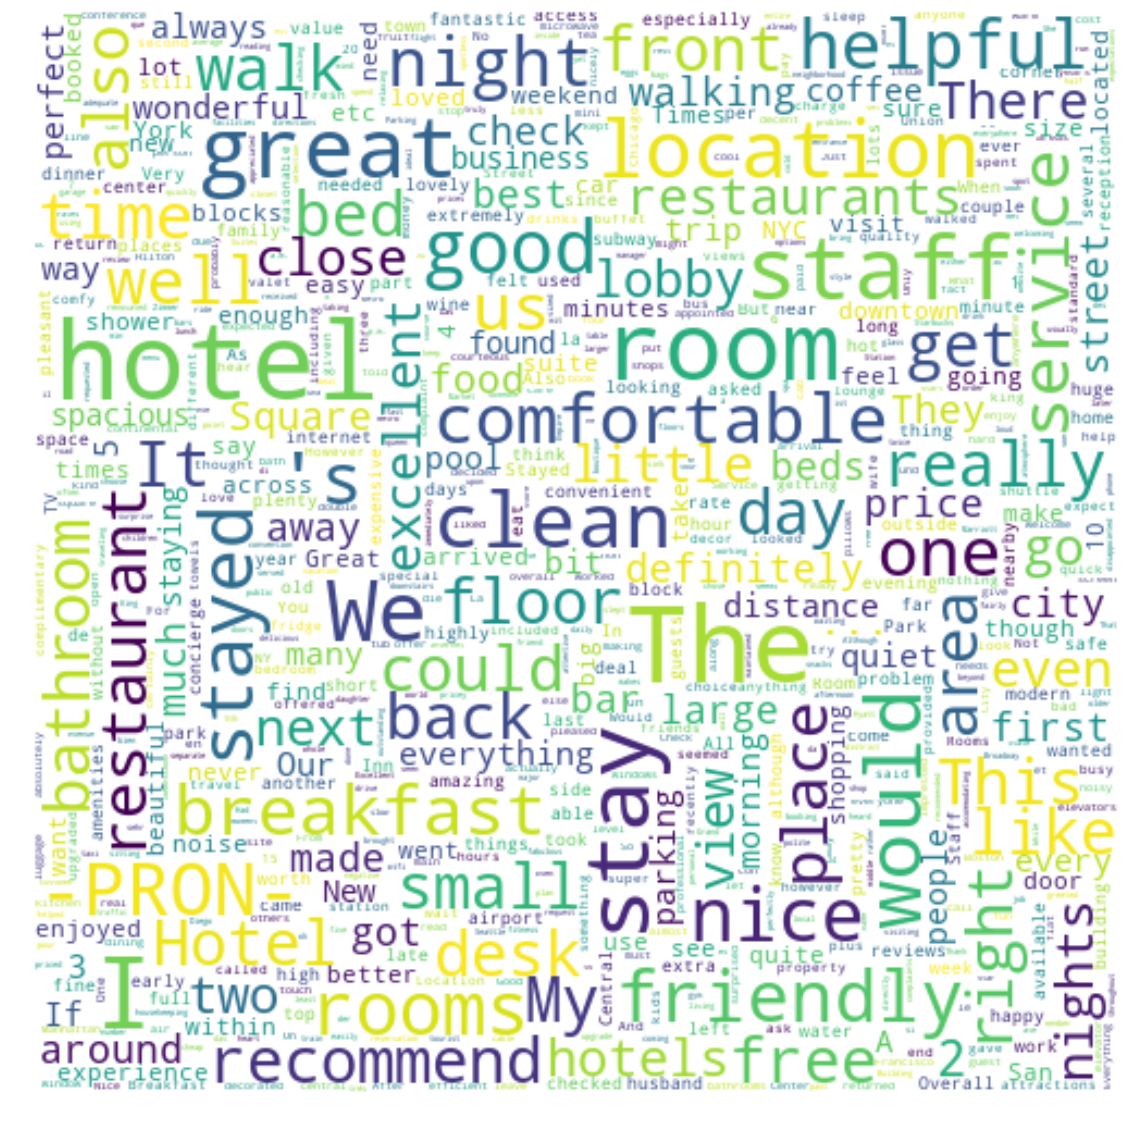

<Figure size 432x288 with 0 Axes>

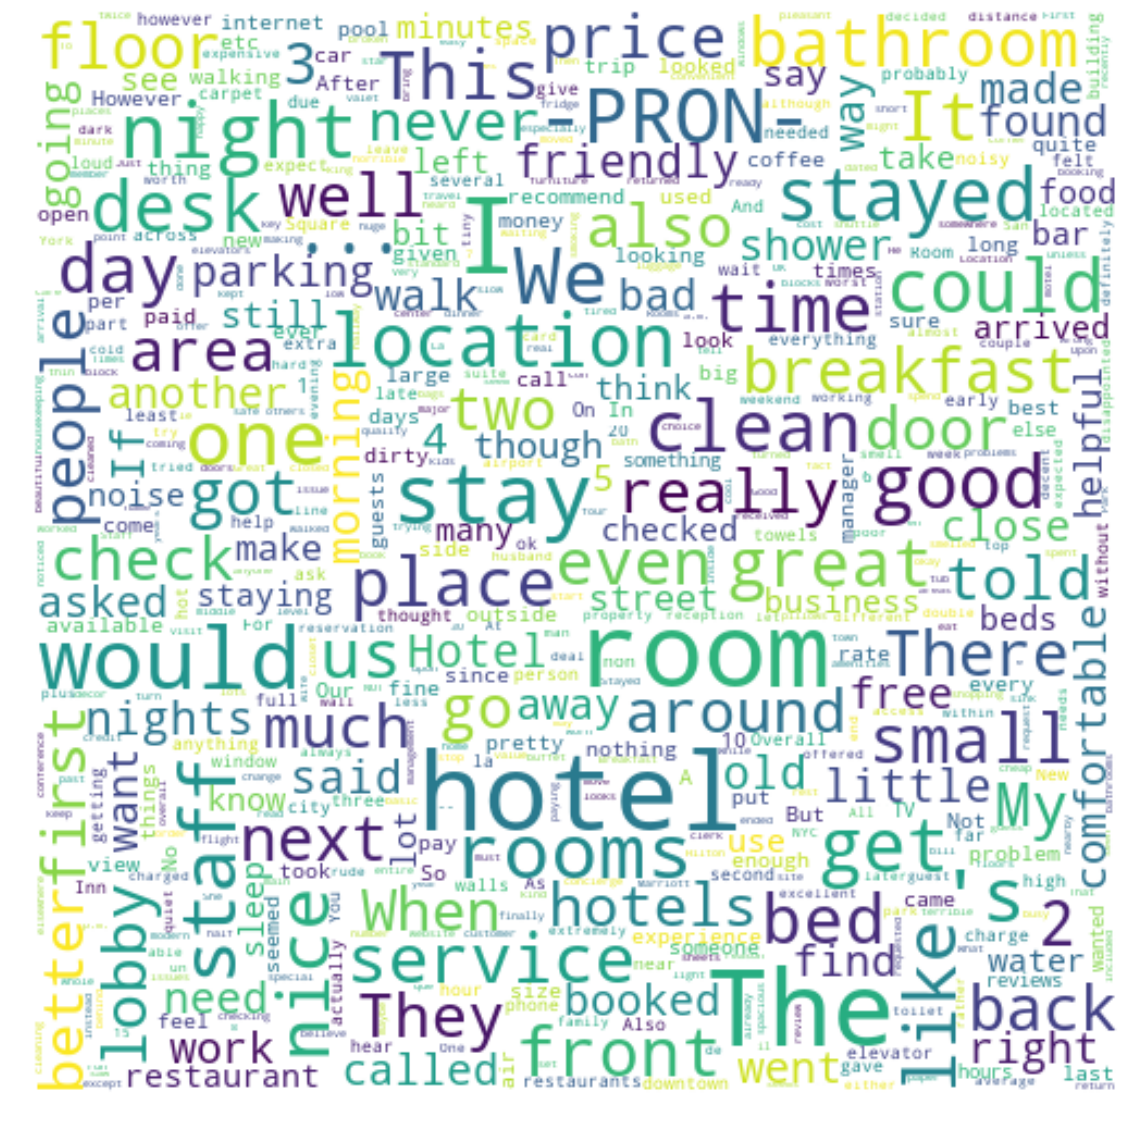

<Figure size 432x288 with 0 Axes>

In [29]:
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from spacy.lang.en import English
import matplotlib.pyplot as plt

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
stop = set(stopwords.words('english'))


def print_save_wordcloud(dico, polarity):
    wordcloud = WordCloud( height = 500, 
                              width = 500, max_font_size=50, 
                              max_words=1000, 
                              background_color="white").generate_from_frequencies(dico)

    plt.figure(figsize= (20,20))
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')#, interpolation='bilinear'
    plt.axis("off")
    plt.savefig('{}_hotel_reviews.png'.format(polarity))
    plt.show()
    plt.clf()

    
    
dico_positive = {}
dico_negative = {}
for idx, row in new_df.iterrows():
    if pd.isna(row['text']) == False:
        spacy_doc = nlp(row['text'])
        if row['rating'] > 3:
            word_set = set()
            words = [tok.lemma_.lower() for tok in spacy_doc]
            words = [word for word in words if word not in stop and word not in string.punctuation]
            word_set.update(words)
            for tok in word_set:
                if tok not in dico_positive:
                    dico_positive[tok] = 1
                else:
                    dico_positive[tok] += 1
        if row['rating'] <=3:
            word_set = set()
            words = [tok.lemma_.lower() for tok in spacy_doc]
            words = [word for word in words if word not in stop and word not in string.punctuation]
            word_set.update(words)
            for tok in word_set:
                if tok not in dico_negative:
                    dico_negative[tok] = 1
                else:
                    dico_negative[tok] += 1

with open('pos_dico_wordcloud.pkl', 'wb') as f:
    pickle.dump(dico_positive, f)  
with open('neg_dico_wordcloud.pkl', 'wb') as f:
    pickle.dump(dico_negative, f)                    
                  
dico_pos_path = 'pos_dico_wordcloud.pkl'   
dico_neg_path = 'neg_dico_wordcloud.pkl'
with open(dico_pos_path, 'rb') as f:
    dico_positive = pickle.load(f)

with open(dico_neg_path, 'rb') as fi:
    dico_negative = pickle.load(fi)        
        
print_save_wordcloud(dico_positive, 'positive')
print_save_wordcloud(dico_negative, 'negative')